In [1]:
!pip install rasterio

     |████████████████████████████████| 18.3MB 231kB/s 


In [3]:
import rasterio as rio
from rasterio.plot import show
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Okeechobee Lake image bands

In [4]:
filepath = '/content/drive/My Drive/Landsat 8/Okeechobee Lake, Florida/LC08_L1TP_015041_20181113_20181127_01_T1_B3.TIF'
b3 = rio.open(filepath)
b3_img = b3.read(1)

filepath = '/content/drive/My Drive/Landsat 8/Okeechobee Lake, Florida/LC08_L1TP_015041_20181113_20181127_01_T1_B4.TIF'
b4 = rio.open(filepath)
b4_img = b4.read(1)

filepath = '/content/drive/My Drive/Landsat 8/Okeechobee Lake, Florida/LC08_L1TP_015041_20181113_20181127_01_T1_B5.TIF'
b5 = rio.open(filepath)
b5_img = b5.read(1)

filepath = '/content/drive/My Drive/Landsat 8/Okeechobee Lake, Florida/LC08_L1TP_015041_20181113_20181127_01_T1_B6.TIF'
b6 = rio.open(filepath)
b6_img = b6.read(1)

filepath = '/content/drive/My Drive/Landsat 8/Okeechobee Lake, Florida/LC08_L1TP_015041_20181113_20181127_01_T1_B8.TIF'
b8 = rio.open(filepath)
b8_img = b8.read(1)

##Performing Level 2 correction on the bands

100%|██████████| 7751/7751 [04:28<00:00, 28.91it/s]


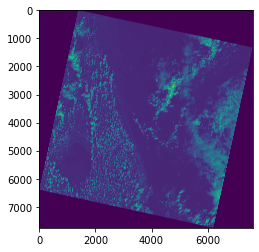

In [5]:
# as refelctance mult and add are same for all the bands
import numpy as np
from tqdm import tqdm

mult = 0.00002
add = -0.1
rows, cols = b3_img.shape
b3_corrected = np.zeros((rows,cols),dtype=np.float64)
for row in tqdm(range(rows)):
  for col in range(cols):
    b3_corrected[row][col] = mult*b3_img[row][col] + add
plt.imshow(b3_corrected)

100%|██████████| 7751/7751 [04:31<00:00, 28.51it/s]


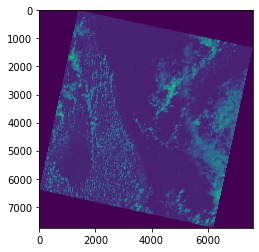

In [6]:
rows, cols = b4_img.shape
b4_corrected = np.zeros((rows,cols),dtype=np.float64)
for row in tqdm(range(rows)):
  for col in range(cols):
    b4_corrected[row][col] = mult*b4_img[row][col] + add
plt.imshow(b4_corrected)

100%|██████████| 7751/7751 [04:37<00:00, 27.95it/s]


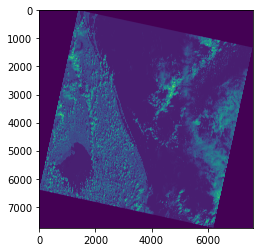

In [7]:
rows, cols = b5_img.shape
b5_corrected = np.zeros((rows,cols),dtype=np.float64)
for row in tqdm(range(rows)):
  for col in range(cols):
    b5_corrected[row][col] = mult*b5_img[row][col] + add
plt.imshow(b5_corrected)

100%|██████████| 7751/7751 [04:29<00:00, 28.73it/s]


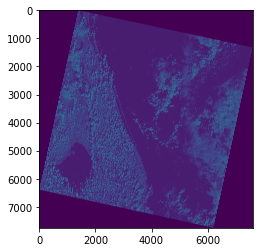

In [8]:
rows, cols = b6_img.shape
b6_corrected = np.zeros((rows,cols),dtype=np.float64)
for row in tqdm(range(rows)):
  for col in range(cols):
    b6_corrected[row][col] = mult*b6_img[row][col] + add
plt.imshow(b6_corrected)

100%|██████████| 15501/15501 [18:06<00:00, 14.27it/s]


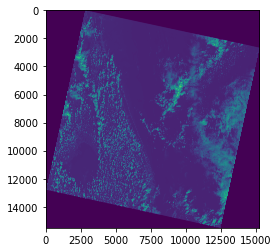

In [9]:
rows, cols = b8_img.shape
b8_corrected = np.zeros((rows,cols),dtype=np.float64)
for row in tqdm(range(rows)):
  for col in range(cols):
    b8_corrected[row][col] = mult*b8_img[row][col] + add
plt.imshow(b8_corrected)

##Getting the NDWI indices (leaf mositure content and water content) for Okeechobee lake

In [11]:
from numpy import newaxis
meta = b5.meta
ndwi_lmc = (b5_corrected.astype(float) - b6_corrected.astype(float))/(b5_corrected + b6_corrected)
meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)
print(ndwi_lmc.shape)
ndwi_lmc = ndwi_lmc[newaxis, :, :]
print(ndwi_lmc.shape)

with rio.open('/content/drive/My Drive/Landsat 8 Indices/ndwi_lmc_okeechobee.tiff', 'w', **meta) as dst:
    dst.write(ndwi_lmc.astype(rio.float32))

meta = b3.meta
ndwi_wc = (b3_corrected.astype(float) - b5_corrected.astype(float))/(b3_corrected + b5_corrected)
ndwi_wc = ndwi_wc[newaxis, :, :]
meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)
with rio.open('/content/drive/My Drive/Landsat 8 Indices/ndwi_wc_okeechobee.tiff', 'w', **meta) as dst:
    dst.write(ndwi_wc.astype(rio.float32))

(7751, 7601)
(1, 7751, 7601)


#Chilika Lake image bands

In [5]:
filepath = '/content/drive/My Drive/Landsat 8/Chilika Lake, Orissa/LC08_L1TP_140046_20181227_20190129_01_T1_B3.TIF'
b3 = rio.open(filepath)
b3_img = b3.read(1)

filepath = '/content/drive/My Drive/Landsat 8/Chilika Lake, Orissa/LC08_L1TP_140046_20181227_20190129_01_T1_B4.TIF'
b4 = rio.open(filepath)
b4_img = b4.read(1)

filepath = '/content/drive/My Drive/Landsat 8/Chilika Lake, Orissa/LC08_L1TP_140046_20181227_20190129_01_T1_B5.TIF'
b5 = rio.open(filepath)
b5_img = b5.read(1)

filepath = '/content/drive/My Drive/Landsat 8/Chilika Lake, Orissa/LC08_L1TP_140046_20181227_20190129_01_T1_B6.TIF'
b6 = rio.open(filepath)
b6_img = b6.read(1)

filepath = '/content/drive/My Drive/Landsat 8/Chilika Lake, Orissa/LC08_L1TP_140046_20181227_20190129_01_T1_B8.TIF'
b8 = rio.open(filepath)
b8_img = b8.read(1)

##Performing Level 2 correction on the bands

100%|██████████| 7821/7821 [04:45<00:00, 27.44it/s]


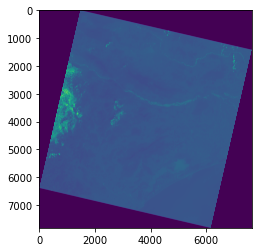

In [10]:
rows, cols = b3_img.shape
b3_corrected = np.zeros((rows,cols),dtype=np.float64)
for row in tqdm(range(rows)):
  for col in range(cols):
    b3_corrected[row][col] = mult*b3_img[row][col] + add
plt.imshow(b3_corrected)

100%|██████████| 7821/7821 [04:40<00:00, 27.89it/s]


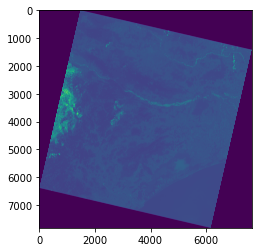

In [11]:
rows, cols = b4_img.shape
b4_corrected = np.zeros((rows,cols),dtype=np.float64)
for row in tqdm(range(rows)):
  for col in range(cols):
    b4_corrected[row][col] = mult*b4_img[row][col] + add
plt.imshow(b4_corrected)

100%|██████████| 7821/7821 [04:39<00:00, 27.98it/s]


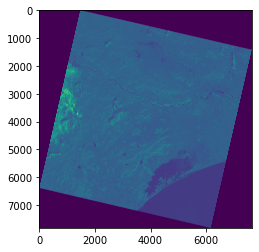

In [12]:
rows, cols = b5_img.shape
b5_corrected = np.zeros((rows,cols),dtype=np.float64)
for row in tqdm(range(rows)):
  for col in range(cols):
    b5_corrected[row][col] = mult*b5_img[row][col] + add
plt.imshow(b5_corrected)

100%|██████████| 7821/7821 [04:36<00:00, 28.31it/s]


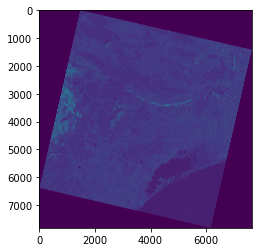

In [8]:
rows, cols = b6_img.shape
b6_corrected = np.zeros((rows,cols),dtype=np.float64)
for row in tqdm(range(rows)):
  for col in range(cols):
    b6_corrected[row][col] = mult*b6_img[row][col] + add
plt.imshow(b6_corrected)

##Getting the NDWI indices (leaf mositure content and water content) for Chilika lake

In [13]:
from numpy import newaxis
meta = b5.meta
ndwi_lmc = (b5_corrected.astype(float) - b6_corrected.astype(float))/(b5_corrected + b6_corrected)
meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)
#print(ndwi_lmc.shape)
ndwi_lmc = ndwi_lmc[newaxis, :, :]
#print(ndwi_lmc.shape)

with rio.open('/content/drive/My Drive/Landsat 8 Indices/ndwi_lmc_chilika.tiff', 'w', **meta) as dst:
    dst.write(ndwi_lmc.astype(rio.float32))

meta = b3.meta
ndwi_wc = (b3_corrected.astype(float) - b5_corrected.astype(float))/(b3_corrected + b5_corrected)
ndwi_wc = ndwi_wc[newaxis, :, :]
meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)
with rio.open('/content/drive/My Drive/Landsat 8 Indices/ndwi_wc_chilika.tiff', 'w', **meta) as dst:
    dst.write(ndwi_wc.astype(rio.float32))